# Which household factors significantly impact education?
## Amogh Giri, Ian Yeh, Rivke Weingarten

In [14]:
import pandas
import matplotlib.pyplot as plt

county_data = pandas.read_csv("https://raw.githubusercontent.com/Amgg12301/CMSC320-Final/main/county_complete.csv")
county_data


,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
3138,56039,Wyoming,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
3139,56041,Wyoming,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5
3140,56043,Wyoming,Washakie County,8289.0,8533,8460.0,8421.0,8427.0,8288.0,8296.0,...,NaN,3.8,4.1,15.0,1.5,7.0,7.8,11.9,89.7,81.9


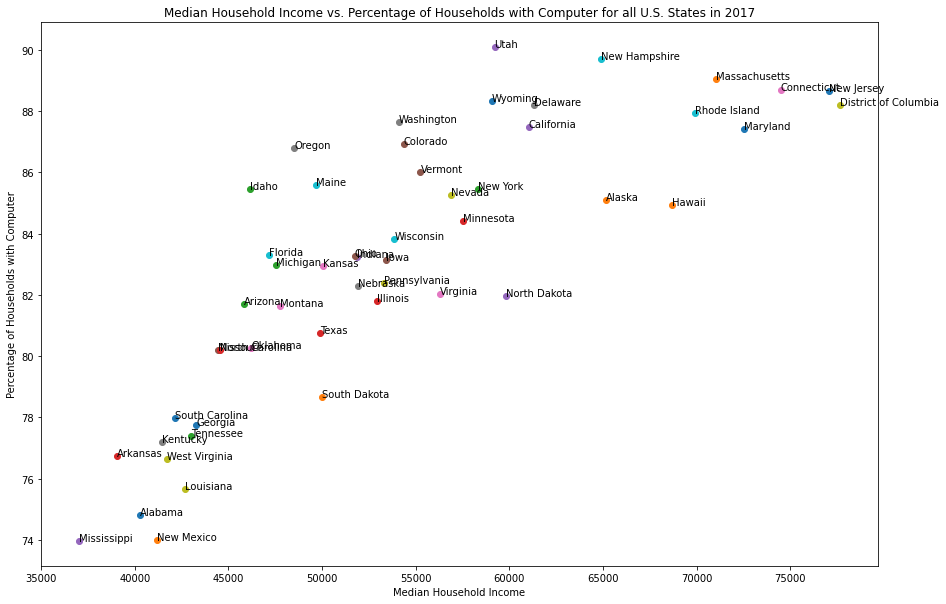

In [15]:
states = county_data['state'].unique()
plt.figure(figsize=(15,10))

for state in states:
    average_income = county_data[county_data.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_computer = county_data[county_data.state == state]['computer_2017']
    average_computer = average_computer.sum() / len(average_computer)

    plt.scatter(average_income, average_computer)
    plt.annotate(state, (average_income, average_computer))

plt.title('Median Household Income vs. Percentage of Households with Computer for all U.S. States in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

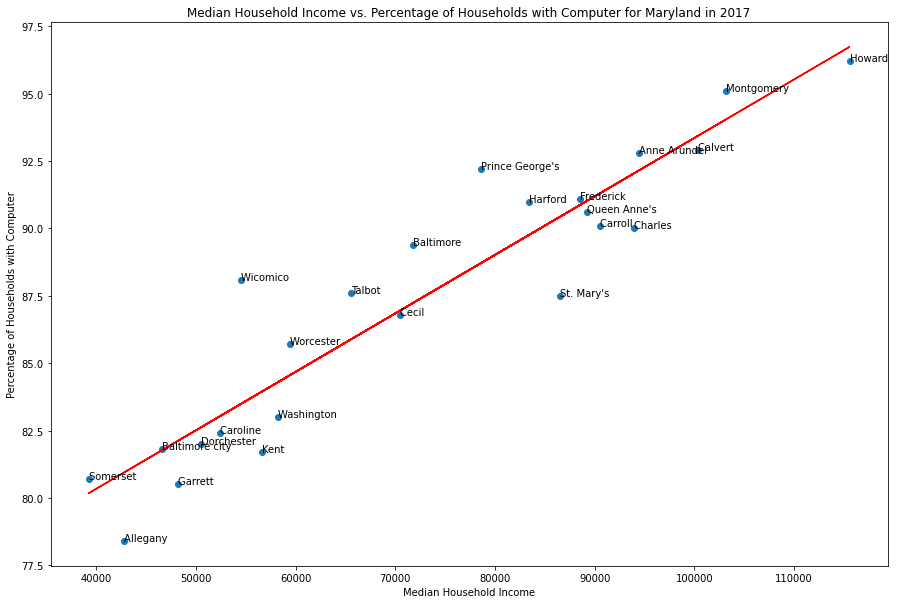

In [16]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

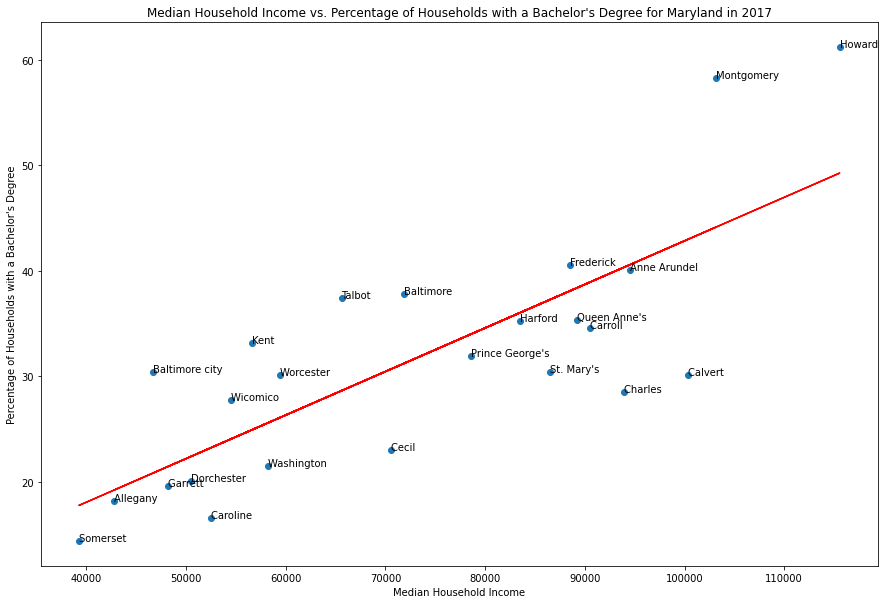

In [17]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

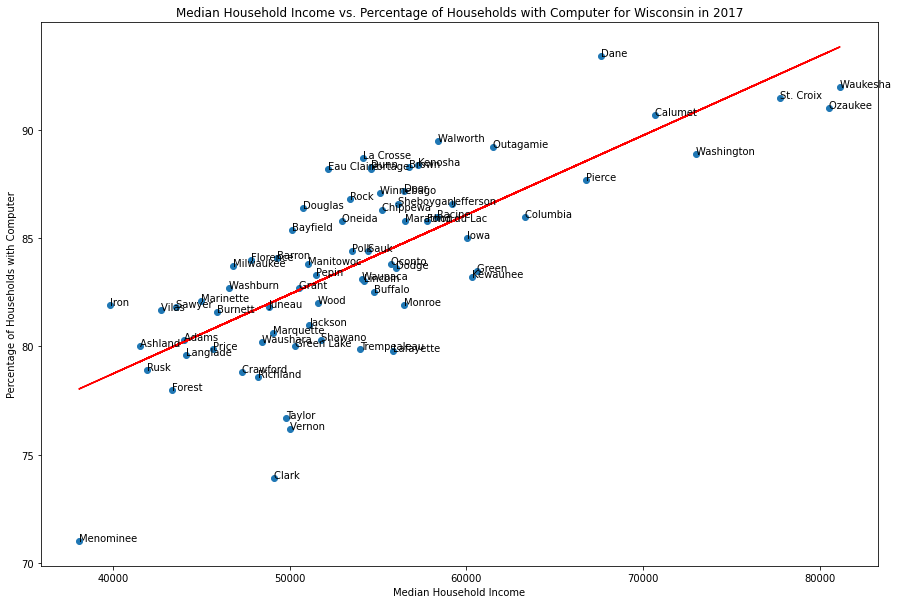

In [18]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

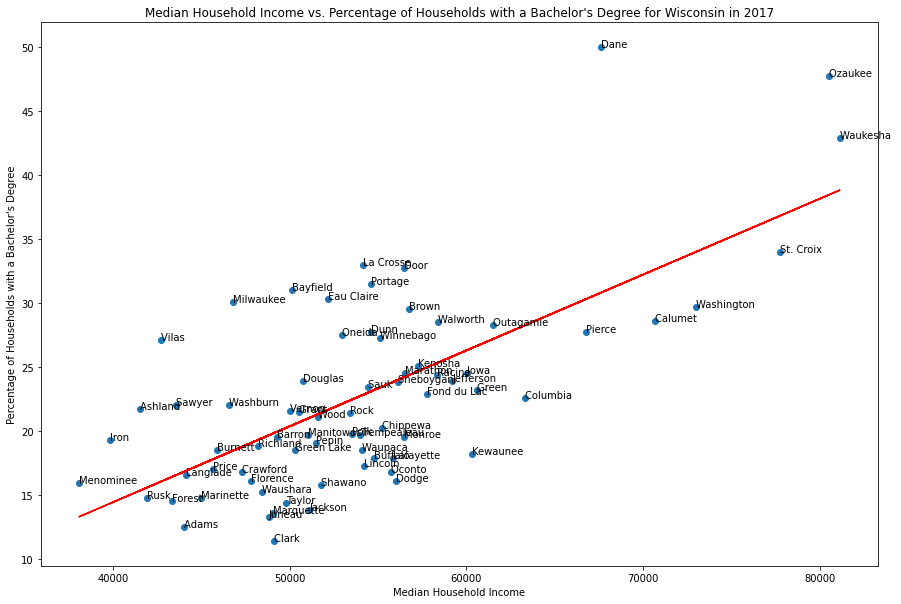

In [19]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Wisconsin']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Wisconsin in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

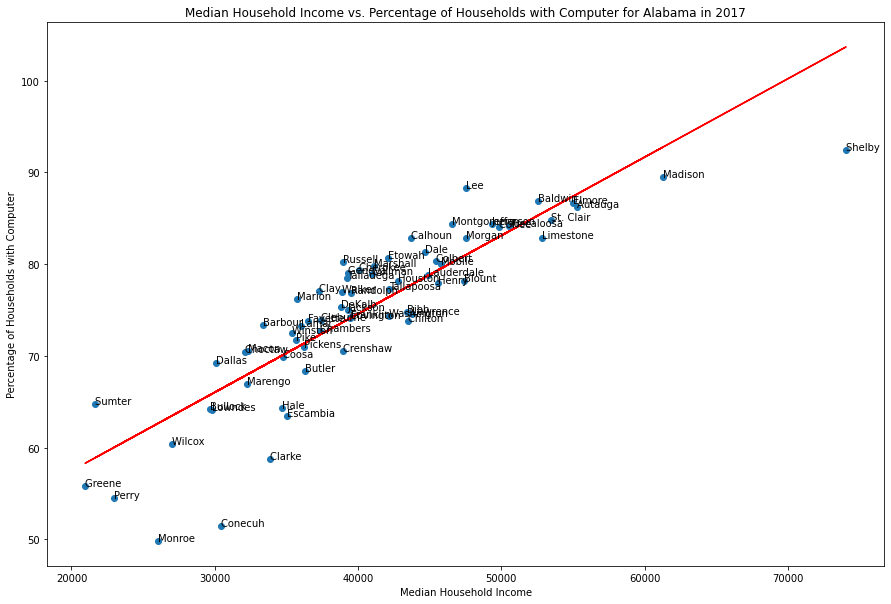

In [20]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['computer_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['computer_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['computer_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with Computer for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with Computer')
plt.show()

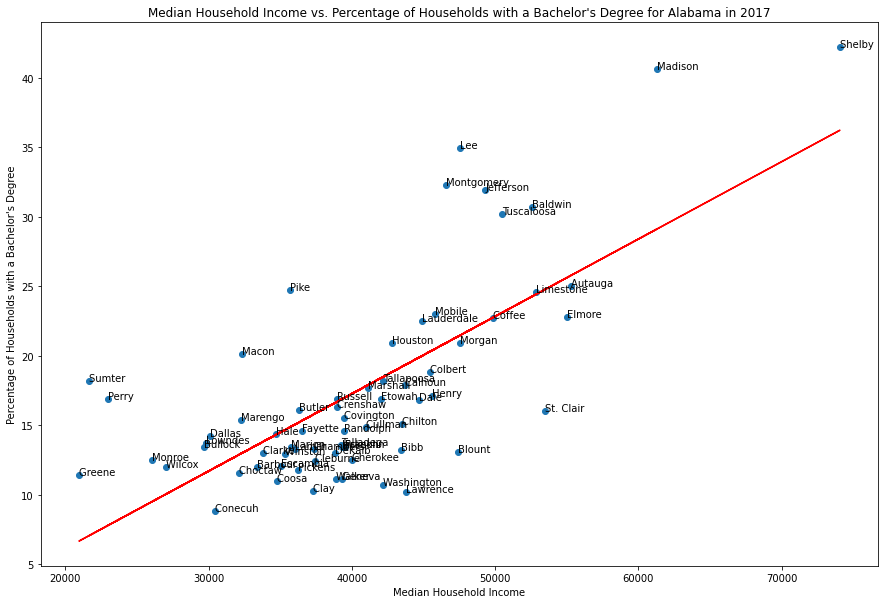

In [21]:
plt.figure(figsize=(15,10))
state = county_data[county_data.state == 'Alabama']
plt.scatter(state['median_household_income_2017'], state['bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of Households with a Bachelor\'s Degree for Alabama in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of Households with a Bachelor\'s Degree')
plt.show()

In [22]:
import statsmodels.api as sm

state_data = county_data[county_data.state == 'Alabama']
y = state_data['bachelors_2017']
x = state_data['median_household_income_2017'] / 1000
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bachelors_2017   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     64.87
Date:                Thu, 13 May 2021   Prob (F-statistic):           2.34e-11
Time:                        14:30:28   Log-Likelihood:                -203.71
No. Observations:                  67   AIC:                             411.4
Df Residuals:                      65   BIC:                             415.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.9864      2.851     -1.749      0.085     -10.680       0.707
median_household_income_2017     0.5562      0.069      8.054      0.000       0.418       0.694
==============================================================================
Omnibus:                        7.570   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.196
Skew:                           0.792   Prob(JB):                       0.0274
Kurtosis:                       3.259   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""